Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 20]]


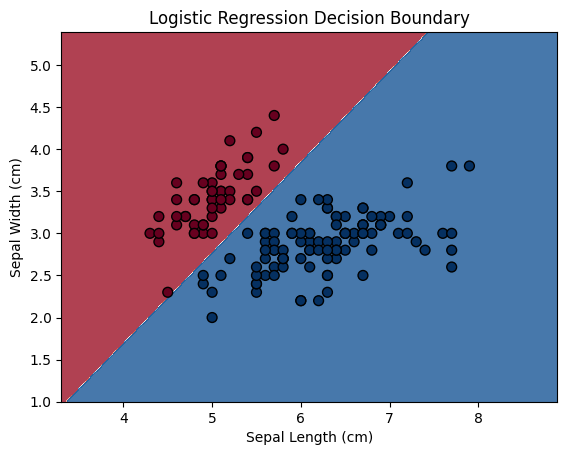

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = (iris.target != 0).astype(int)  # Binary classification: setosa (0) vs. versicolor/virginica (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

Sample Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


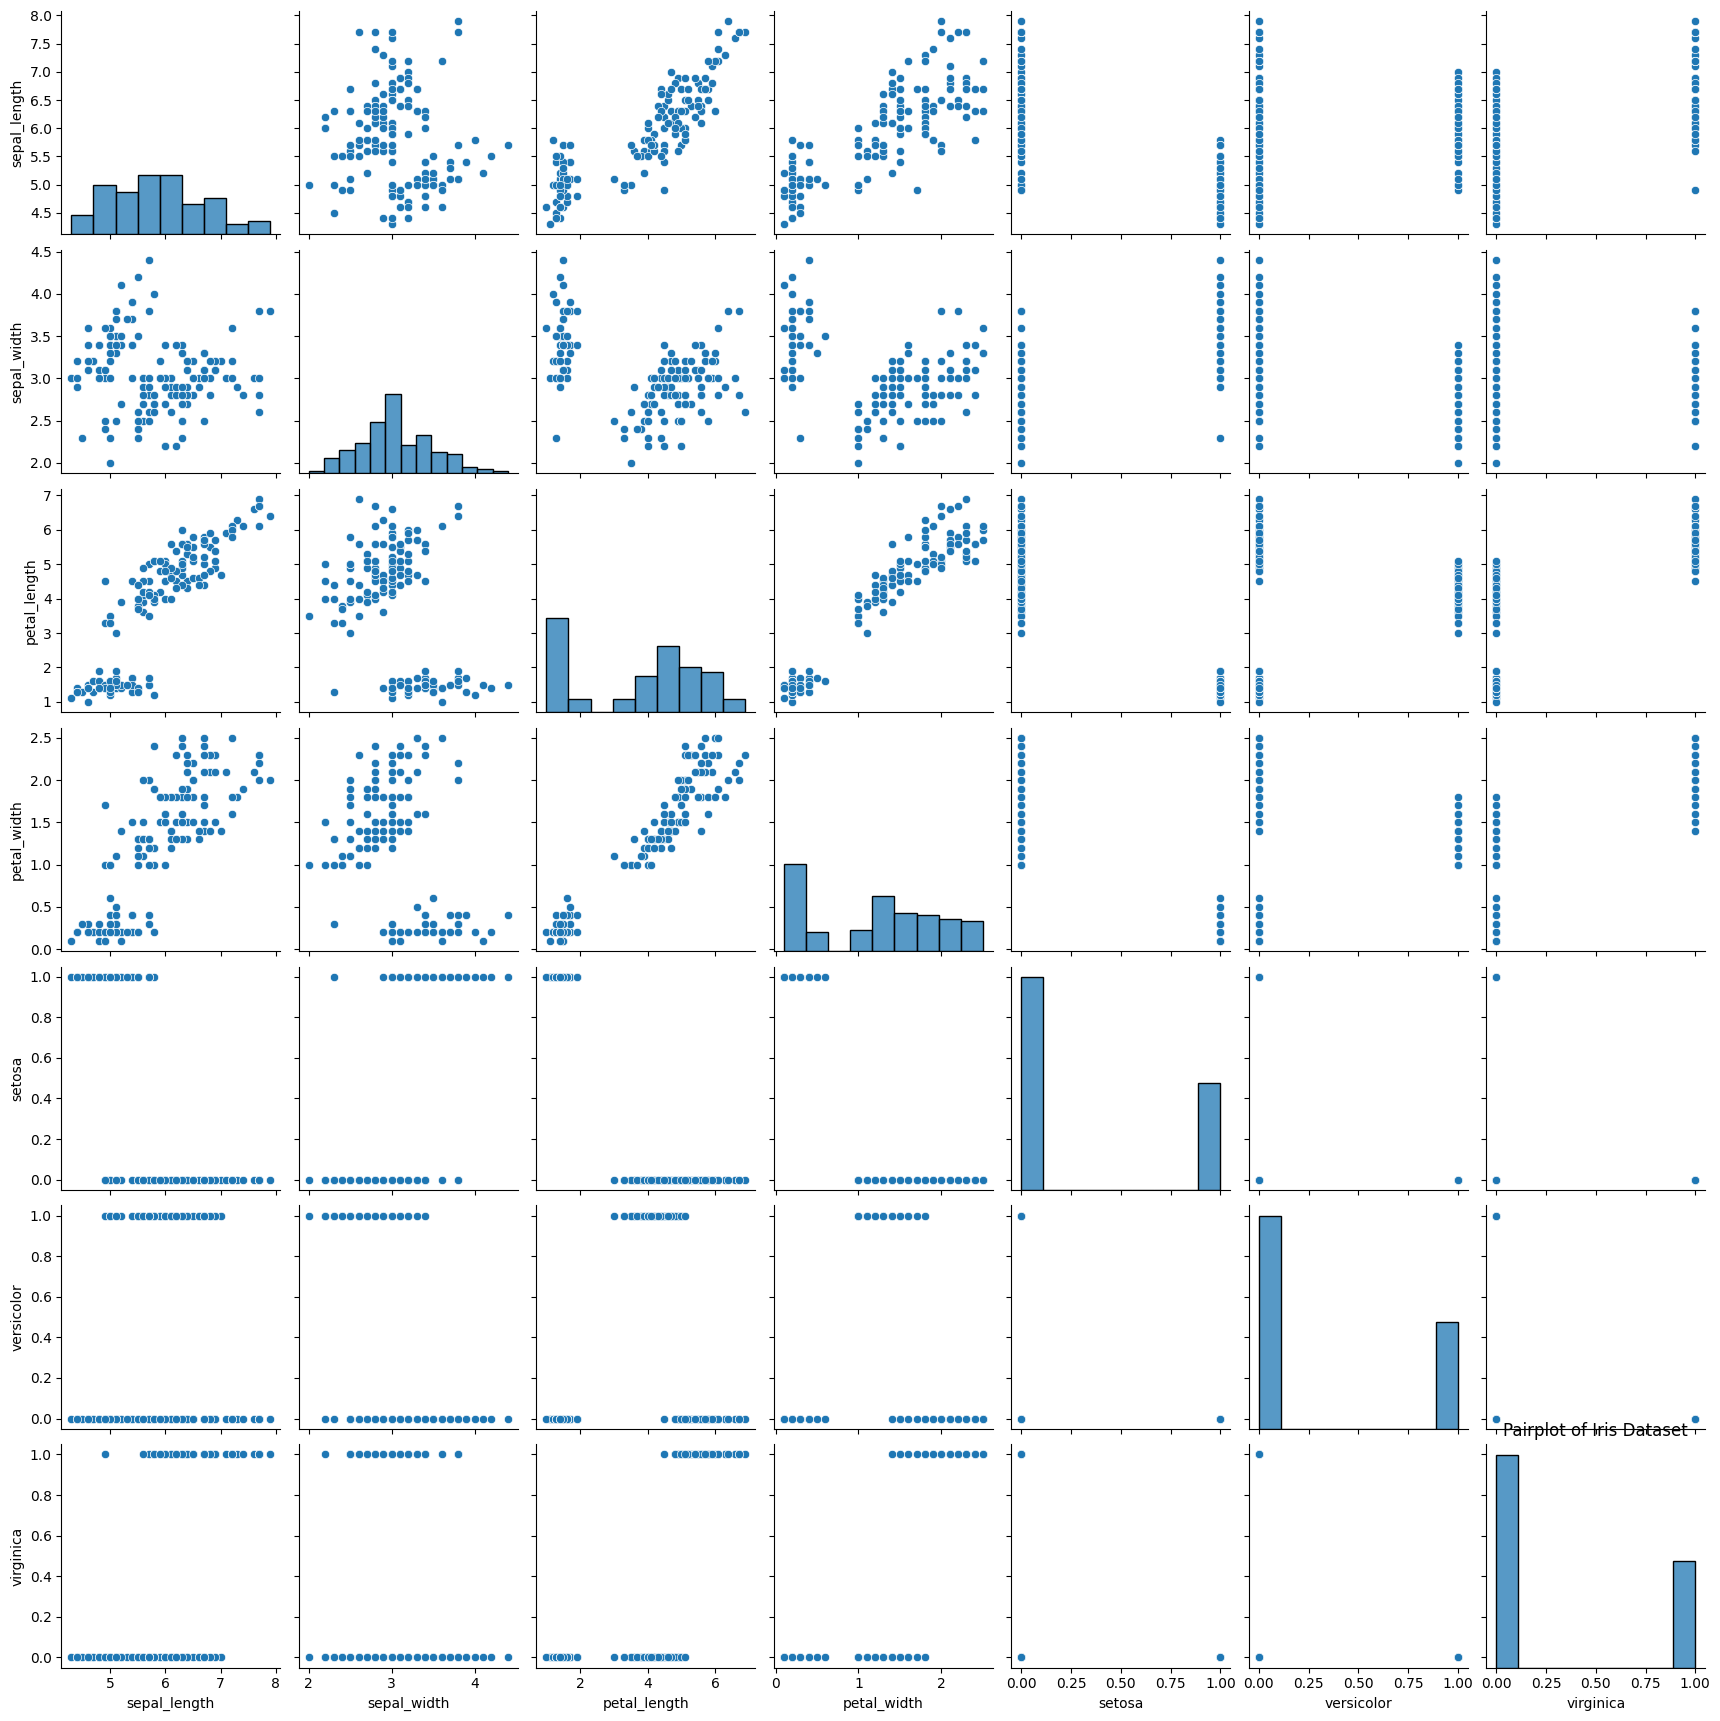

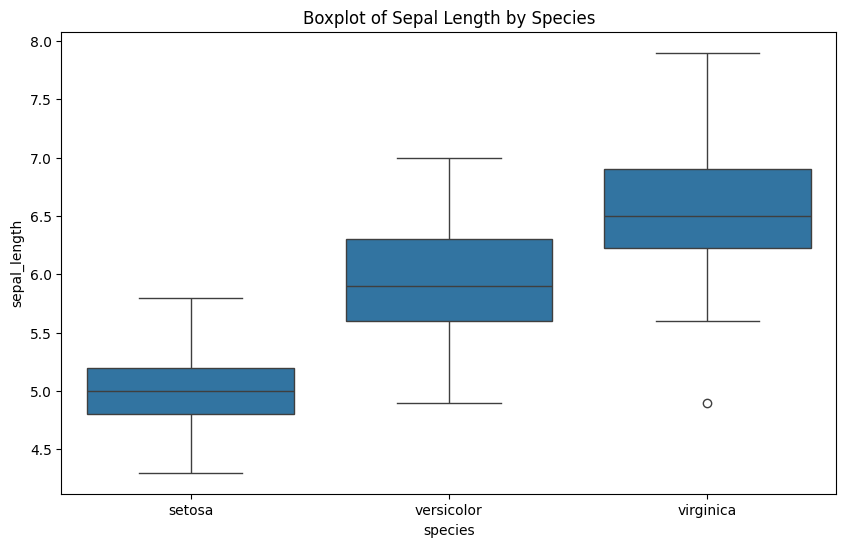

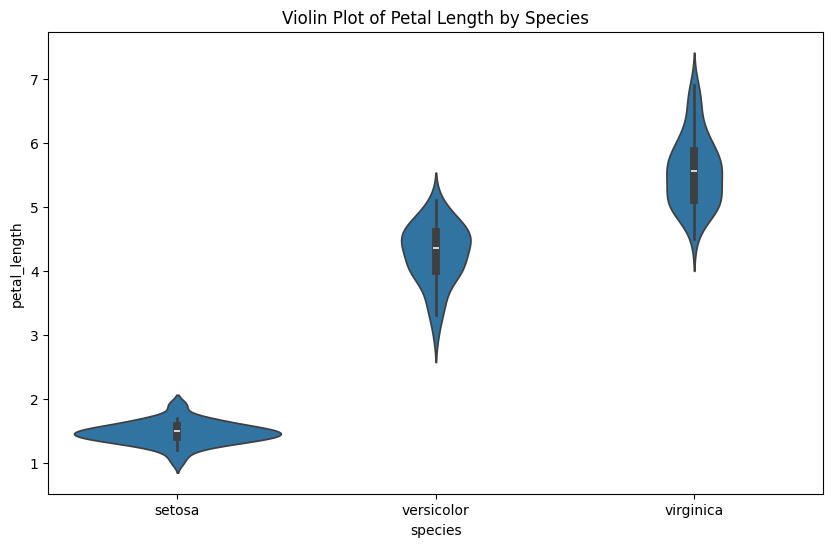

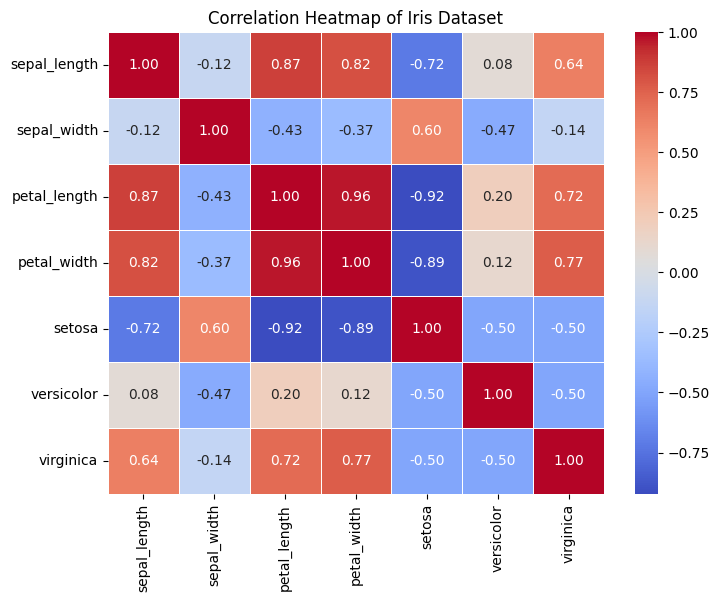

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load a sample dataset (Iris dataset)
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print("Sample Dataset:")
print(iris.head())

# One-hot encoding for the 'species' column
one_hot_encoder = OneHotEncoder()
species_encoded = one_hot_encoder.fit_transform(iris[['species']])

# Create a DataFrame from the encoded species column
species_encoded_df = pd.DataFrame(species_encoded.toarray(), columns=one_hot_encoder.categories_[0])

# Concatenate the original DataFrame with the encoded species DataFrame
iris_encoded = pd.concat([iris.drop(columns=['species']), species_encoded_df], axis=1)

# Pairplot to visualize relationships between numerical features
sns.pairplot(iris_encoded)
plt.title('Pairplot of Iris Dataset')
plt.show()

# Boxplot to visualize distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

# Violin plot to compare the distribution of petal length for each species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_length', data=iris)
plt.title('Violin Plot of Petal Length by Species')
plt.show()

# Heatmap to visualize the correlation matrix
correlation_matrix = iris_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

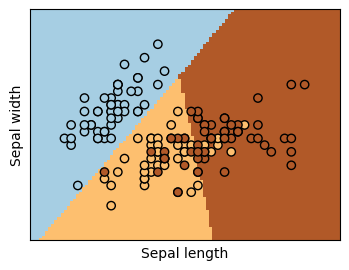

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

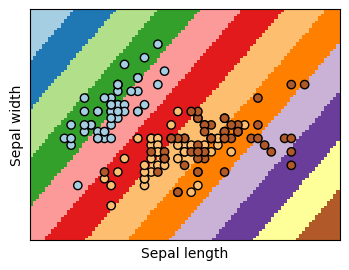

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
linreg = LinearRegression()
linreg.fit(X, Y)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
linreg,
X,
cmap=plt.cm.Paired,
ax=ax,
response_method="predict",
plot_method="pcolormesh",
shading="auto",
xlabel="Sepal length",
ylabel="Sepal width",
eps=0.5,
)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()
